In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

38.298691145564106 -91.22111343812686
39.29836778640632 -114.52882711975694
-44.751778146687094 107.36920238947943
37.394222557324795 -157.70892214399692
-15.666534275320757 -170.81164267699143
65.92336145545096 76.55800806637865
26.07606375183508 -129.15770119726756
84.66750304633516 161.56055543424975
-6.970140832529623 -11.825662689253335
-30.32789136118364 146.26208900763817
-68.6869439362749 94.67725659696146
14.033365557156998 125.6660554089309
79.52013772288507 -68.91752079691145
-35.84655026419127 48.66380485955767
22.843833309755553 -52.40365991422796
-61.90409934277084 28.75855564317598
7.793070924523931 173.2800862528946
6.594345801637502 -169.69575229872103
-33.977383237124684 136.96296053310078
30.82529595270441 -87.70239855029378
87.0586167678214 105.42268356160588
-16.982293688429863 102.32199863167932
72.47078562360676 17.348193478858946
-72.06498983163198 35.32400230275016
-34.452692381384466 30.68398757512304
5.292748198697112 -110.23948895973272
-51.40360226901892 13

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f3958889136524e4728d9e9b1249cc9


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | washington
Processing Record 2 of Set 1 | west wendover
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | lalomanu
City not found. Skipping...
Processing Record 6 of Set 1 | novyy urengoy
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | dubbo
Processing Record 11 of Set 1 | gigmoto
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | whyalla
Processing Record 18 of Set 1 | daphne
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 21 of Set

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Washington,47.5001,-120.5015,68.40,36,0,3.67,US,2022-07-20 14:39:14
1,West Wendover,40.7391,-114.0733,70.81,56,0,3.44,US,2022-07-20 14:39:14
2,Busselton,-33.6500,115.3333,63.66,83,100,14.25,AU,2022-07-20 14:39:14
3,Kapaa,22.0752,-159.3190,77.32,86,40,12.66,US,2022-07-20 14:39:15
4,Novyy Urengoy,66.0833,76.6333,59.58,50,100,14.07,RU,2022-07-20 14:39:15
5,Lompoc,34.6391,-120.4579,55.54,100,100,0.00,US,2022-07-20 14:39:15
6,Cherskiy,68.7500,161.3000,36.61,87,98,11.07,RU,2022-07-20 14:39:16
7,Georgetown,5.4112,100.3354,84.13,82,20,3.44,MY,2022-07-20 14:34:58
8,Dubbo,-32.2500,148.6167,51.93,71,40,11.50,AU,2022-07-20 14:39:16
9,Gigmoto,13.7796,124.3900,81.75,86,98,5.37,PH,2022-07-20 14:39:17


In [12]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [13]:
city_data_df=city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Washington,US,2022-07-20 14:39:14,47.5001,-120.5015,68.40,36,0,3.67
1,West Wendover,US,2022-07-20 14:39:14,40.7391,-114.0733,70.81,56,0,3.44
2,Busselton,AU,2022-07-20 14:39:14,-33.6500,115.3333,63.66,83,100,14.25
3,Kapaa,US,2022-07-20 14:39:15,22.0752,-159.3190,77.32,86,40,12.66
4,Novyy Urengoy,RU,2022-07-20 14:39:15,66.0833,76.6333,59.58,50,100,14.07
5,Lompoc,US,2022-07-20 14:39:15,34.6391,-120.4579,55.54,100,100,0.00
6,Cherskiy,RU,2022-07-20 14:39:16,68.7500,161.3000,36.61,87,98,11.07
7,Georgetown,MY,2022-07-20 14:34:58,5.4112,100.3354,84.13,82,20,3.44
8,Dubbo,AU,2022-07-20 14:39:16,-32.2500,148.6167,51.93,71,40,11.50
9,Gigmoto,PH,2022-07-20 14:39:17,13.7796,124.3900,81.75,86,98,5.37


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658328844.7922604

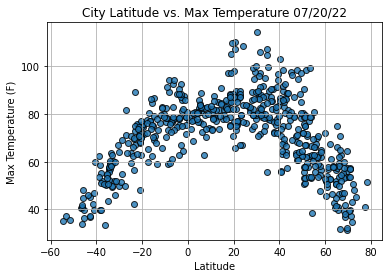

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

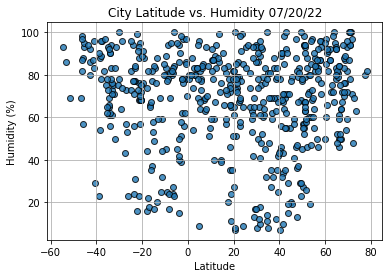

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

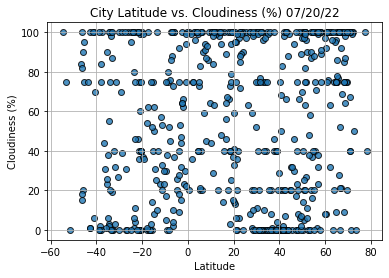

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

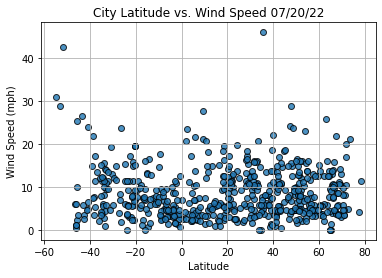

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
#print(weather_api_key)

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
#city_data_df.head()

In [35]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2022-07-20 14:39:18
Lat                        3.0707
Lng                      172.7902
Max Temp                    81.03
Humidity                       80
Cloudiness                    100
Wind Speed                  11.07
Name: 13, dtype: object

In [37]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
558     True
559     True
560     True
561    False
562     True
Name: Lat, Length: 563, dtype: bool

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Washington,US,2022-07-20 14:39:14,47.5001,-120.5015,68.40,36,0,3.67
1,West Wendover,US,2022-07-20 14:39:14,40.7391,-114.0733,70.81,56,0,3.44
3,Kapaa,US,2022-07-20 14:39:15,22.0752,-159.3190,77.32,86,40,12.66
4,Novyy Urengoy,RU,2022-07-20 14:39:15,66.0833,76.6333,59.58,50,100,14.07
5,Lompoc,US,2022-07-20 14:39:15,34.6391,-120.4579,55.54,100,100,0.00


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

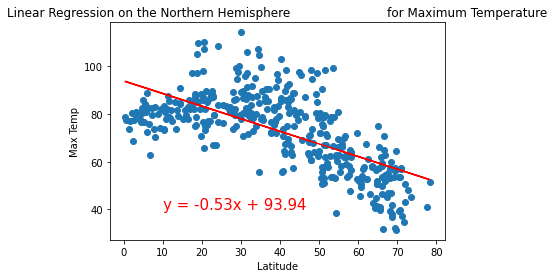

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

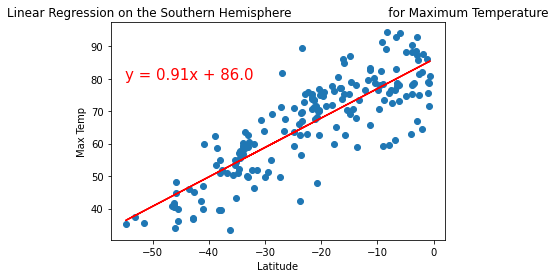

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,80))

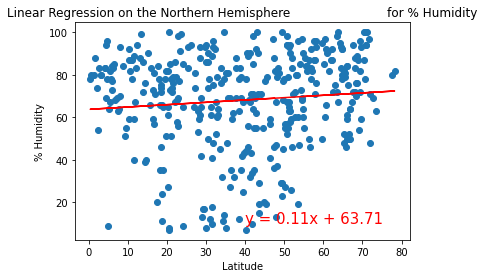

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

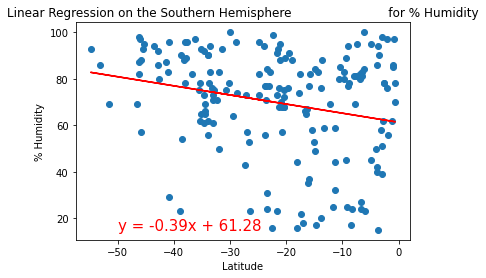

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

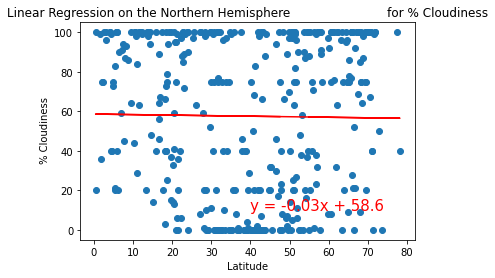

In [57]:
# Linear regression on the Northern Hemisphere - cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', ' % Cloudiness',(40,10))

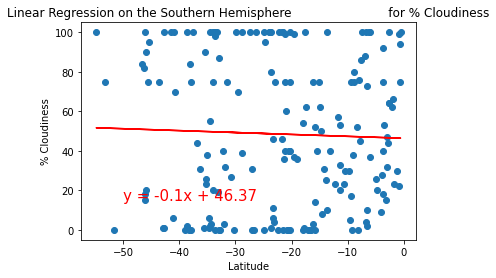

In [58]:
# Linear regression on the Southern Hemisphere - % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

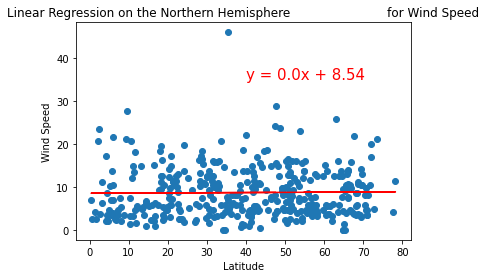

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

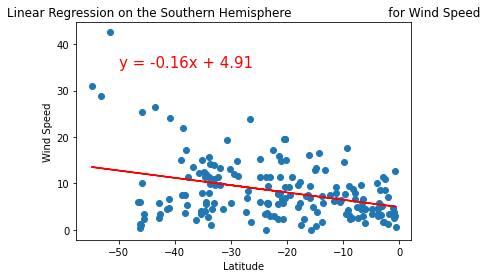

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))